In [7]:
# load packages
import cartopy
import cartopy.crs as ccrs
import os
import matplotlib.pyplot as plt
import xarray as xr
import requests

In [2]:
# set data and output folder
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [8]:
# define download function
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

# download netCDF data
filename = 'gistemp1200_GHCNv4_ERSSTv5.nc'

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/gistemp/'

download(data_url + filename)

Downloaded data/gistemp1200_GHCNv4_ERSSTv5.nc


In [9]:
# read .nc file using xarray and select the tempanomaly variable
file_path = os.path.join(data_folder, filename)
ds = xr.open_dataset(file_path)
da = ds.tempanomaly
da

<xarray.DataArray 'tempanomaly' (time: 1733, lat: 90, lon: 180)> Size: 112MB
[28074600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * time     (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2024-05-15
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [10]:
ds

<xarray.Dataset> Size: 112MB
Dimensions:      (lat: 90, lon: 180, time: 1733, nv: 2)
Coordinates:
  * lat          (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lon          (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2024-05-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] 28kB ...
    tempanomaly  (time, lat, lon) float32 112MB ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2024-06-09 12:46:51 by SBBX_to_nc 2.0 - ILAND=1200,...

In [11]:
# aggregate data to mean yearly temp anomalies
yearly = da.groupby('time.year').mean(dim='time')
yearly

<xarray.DataArray 'tempanomaly' (year: 145, lat: 90, lon: 180)> Size: 9MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 3.6616666 ,  3.6616666 ,  3.6616666 , ...,  3.6616666 ,
          3.6616666 ,  3.6616666 ],
        [ 3.6616666 ,  3.6616666 ,  3.6616666 , ...,  3.6616666 ,
          3.6616666 ,  3.6616666 ],
        [ 3.6616666 ,  3.6616666 ,  3.6616666 , ...,  3.6616666 ,
          3.6616666 ,  3.6616666 ]],

       [[-0.748     , -0.748     , -0.748     , ..., -0.748     ,
         -0.748     , -0.748     ],
        [-0.748     , -0.748     , -0.748     , ..., -0.748     ,
         -0.748     , -0.748     ],
        [-0.748     , -0.748     , -0.748     , ..., -0.748     ,
         -0.748     , -0.748     ],
        ...,
        [ 4.4999995 ,  4.4999995 ,  4.4999995 , ...,  4.4999995 ,
          4.4999995 ,  4.4999995 ],
        [ 4.4999995 ,  4.4999995 ,  4.4999995 , ...,  4.4999995 ,
          4.4999995 ,  4.4999995 ],
        [ 4.4999995 ,  4.4999995 ,  4.4999995 , ...,  4.4999995 ,
          4.4999995 ,  4.4999995 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * year     (year) int64 1kB 1880 1881 1882 1883 1884 ... 2021 2022 2023 2024
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

In [12]:
# extract values for a single year using the .sel method
year = 2023
anomaly = yearly.sel(year=year)
anomaly

<xarray.DataArray 'tempanomaly' (lat: 90, lon: 180)> Size: 65kB
array([[-0.10916665, -0.10916665, -0.10916665, ..., -0.10916665,
        -0.10916665, -0.10916665],
       [-0.10916665, -0.10916665, -0.10916665, ..., -0.10916665,
        -0.10916665, -0.10916665],
       [-0.10916665, -0.10916665, -0.10916665, ..., -0.10916665,
        -0.10916665, -0.10916665],
       ...,
       [ 3.6616666 ,  3.6616666 ,  3.6616666 , ...,  3.6616666 ,
         3.6616666 ,  3.6616666 ],
       [ 3.6616666 ,  3.6616666 ,  3.6616666 , ...,  3.6616666 ,
         3.6616666 ,  3.6616666 ],
       [ 3.6616666 ,  3.6616666 ,  3.6616666 , ...,  3.6616666 ,
         3.6616666 ,  3.6616666 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
    year     int64 8B 2023
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

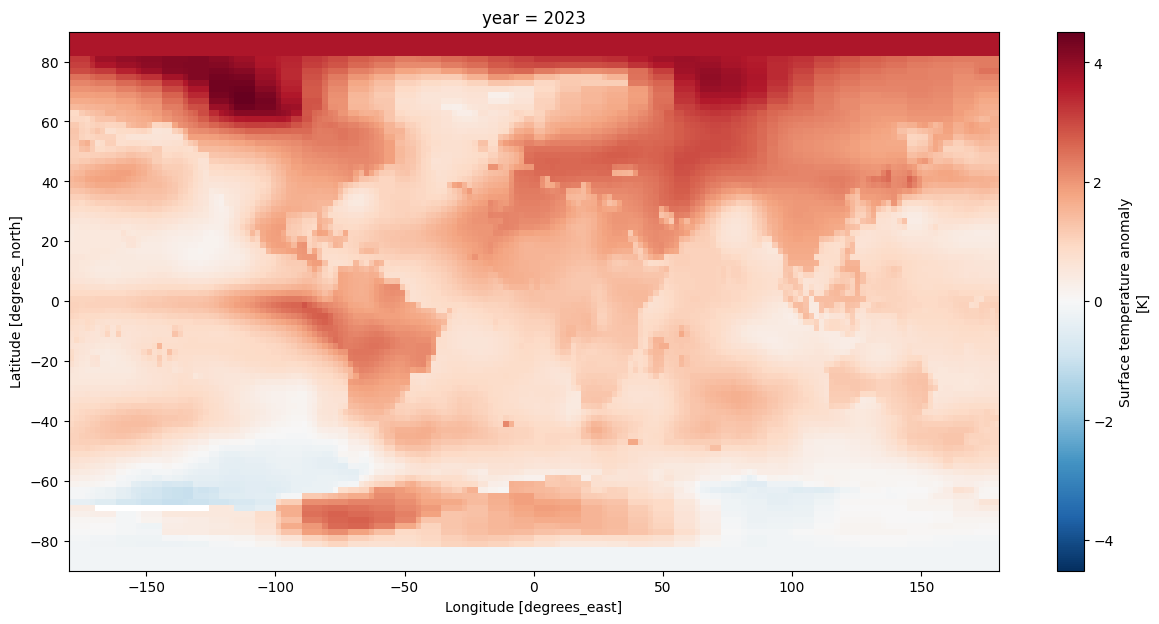

In [14]:
# basic plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)
anomaly.plot.imshow(ax=ax)
plt.show()

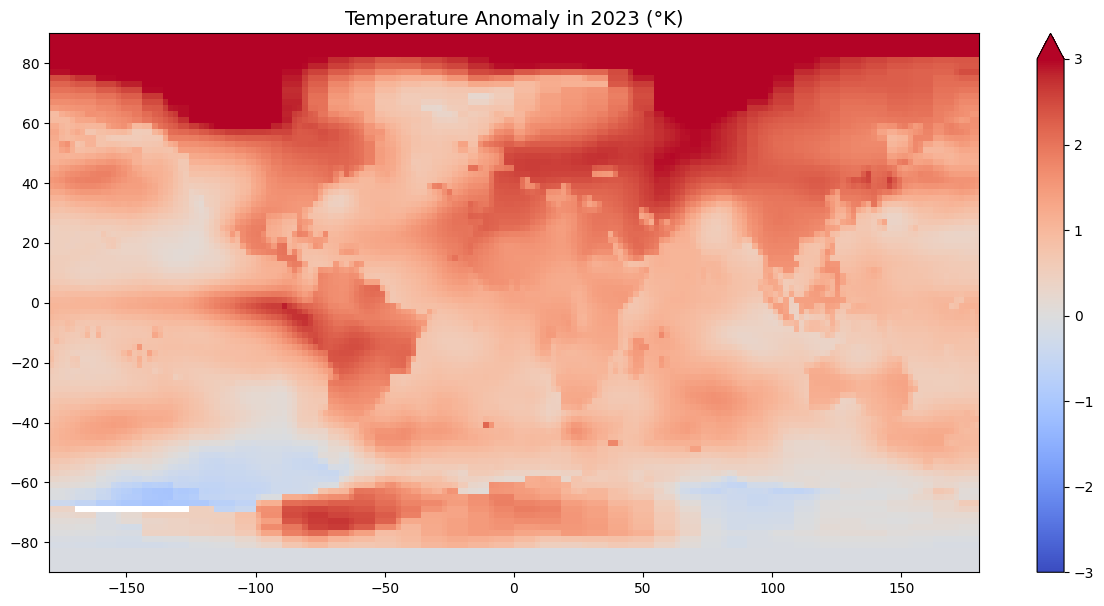

In [15]:
# customize plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)

anomaly.plot.imshow(ax=ax,
    vmin=-3, vmax=3, add_labels=False, cmap='coolwarm')

ax.set_title(f'Temperature Anomaly in {year} (°K)', fontsize = 14)

plt.show()

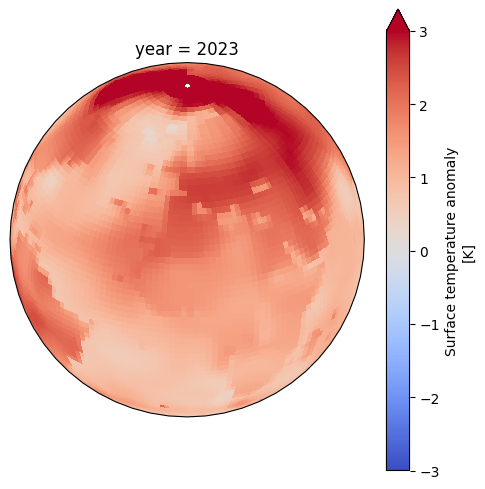

In [16]:
# plot using cartopy
projection = ccrs.Orthographic(0, 30)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection})
fig.set_size_inches(5,5)

anomaly.plot.imshow(ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()

In [28]:
from urllib.request import urlopen
import ssl

fobj = urlopen('https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip',
                         context=ssl.SSLContext())

/var/folders/61/b_g16g9n7h1864j7mrkvshbw0000gn/T/ipykernel_56983/4129130018.py:5: DeprecationWarning: ssl.SSLContext() without protocol argument is deprecated.
  context=ssl.SSLContext())
/var/folders/61/b_g16g9n7h1864j7mrkvshbw0000gn/T/ipykernel_56983/4129130018.py:5: DeprecationWarning: ssl.PROTOCOL_TLS is deprecated
  context=ssl.SSLContext())


In [29]:
import ssl

try:
   _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

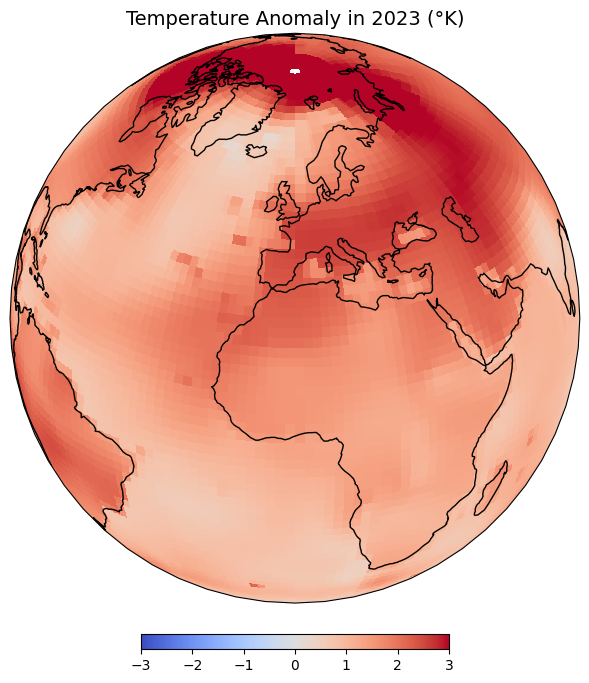

In [31]:
# adjust colorbar
projection = ccrs.Orthographic(0, 30)

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection})
fig.set_size_inches(8, 8)
anomaly.plot.imshow(
    ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree(),
    add_labels=False,
    cbar_kwargs=cbar_kwargs)

ax.coastlines()
plt.title(f'Temperature Anomaly in {year} (°K)', fontsize = 14)

output_folder = 'output'
output_path = os.path.join(output_folder, 'anomaly.jpg')
plt.savefig(output_path, dpi=300)
plt.show()

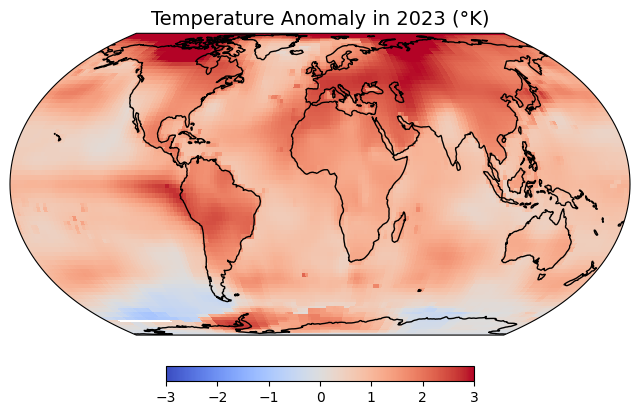

In [36]:
# plot using equalearth projection
projection = ccrs.Orthographic(0, 30)
projection = cartopy.crs.EqualEarth()

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection})
fig.set_size_inches(8, 8)
anomaly.plot.imshow(
    ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree(),
    add_labels=False,
    cbar_kwargs=cbar_kwargs)

ax.coastlines()
plt.title(f'Temperature Anomaly in {year} (°K)', fontsize = 14)

output_folder = 'output'
output_path = os.path.join(output_folder, 'anomaly.jpg')
plt.savefig(output_path, dpi=300)
plt.show()